In [1]:
import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import pursuitnet as pn
import pursuitnet.nn as nn
import pursuitnet.optim as optim

In [2]:
# Set random seeds for reproducibility
# seed = 42
# np.random.seed(seed)
# torch.manual_seed(seed)
# if torch.cuda.is_available():
#     torch.cuda.manual_seed(seed)
#     torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

In [3]:
# import pursuitnet as pn
# import time

# print("\nTesting all modules:")
# pn.random.seed(int(time.time()))
# pn.random.print_random_number()
# pn.nn.print_random_number()
# pn.optim.print_random_number()

# print("\nTesting seeding:")
# pn.random.seed(42)
# pn.random.print_random_number()
# pn.nn.print_random_number()
# pn.optim.print_random_number()

# print("\nTesting seeding again:")
# pn.random.seed(42)
# pn.random.print_random_number()
# pn.nn.print_random_number()
# pn.optim.print_random_number()

# print("\nTesting without seeding:")
# pn.random.print_random_number()
# pn.nn.print_random_number()
# pn.optim.print_random_number()

Load Data

In [4]:
# load the dataset, split into input (X) and output (y) variables
dataset = np.loadtxt('data/train.csv', delimiter=',', skiprows=1)
X = dataset[:,1:]
print(X)
y = dataset[:, 0]
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1. 0. 1. ... 7. 6. 9.]


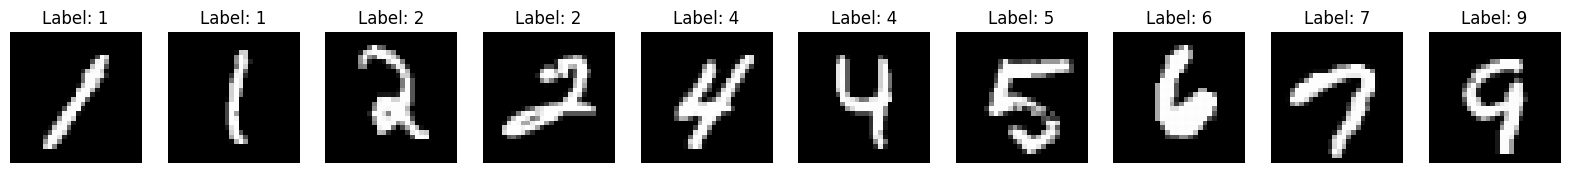

In [5]:
num_samples = 10
sample_indices = pn.rand.choice(len(X), num_samples, replace=False)
sample_images = X[sample_indices]
sample_labels = y[sample_indices]

# Visualize the samples along with their labels
fig, axes = plt.subplots(1, num_samples, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {int(sample_labels[i])}')
    ax.axis('off')
plt.show()

In [6]:
# Normalize the training data
X = X / 255.0  # Normalize pixel values to [0, 1]

In [7]:
# X = torch.tensor(X, dtype=torch.float32)
# y = torch.tensor(y, dtype=torch.int64)  # Class indices should be int64

In [8]:
X = pn.Tensor(X, dtype=pn.float32)
y = pn.Tensor(y, dtype=pn.int64)  # Class indices should be int64

Define PyTorch Model

In [9]:
model = nn.Sequential(
    nn.Linear(784, 300),
    nn.ReLU(),
    nn.Linear(300, 300),
    nn.ReLU(),
    nn.Linear(300, 10)
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=300)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=10)
)


Define Loss Function and Optimizers

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Run a Training Loop

In [11]:
# Run the training loop
n_epochs = 10
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i + batch_size]
        ybatch = y[i:i + batch_size]

        # Forward pass
        y_pred = model(Xbatch)

        # Compute loss
        loss = loss_fn(y_pred, ybatch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Finished epoch {epoch}, latest loss {loss.item()}')

KeyboardInterrupt: 

Evaluate the Model

In [16]:
# Evaluate the model
with pn.no_grad():
    y_pred = model(X)
    predictions = y_pred.argmax(axis=1)
    mean_accuracy = (predictions == y).mean()
    print(f"Mean Accuracy: {mean_accuracy.item():.4f}")

Mean Accuracy: 0.8821


In [14]:
# Load the test dataset
test_data_path = 'data/test.csv'
test_df = pd.read_csv(test_data_path)

# Prepare the test data
test_X = test_df.values
test_X = test_X / 255.0  # Normalize pixel values to [0, 1]
test_X = pn.Tensor(test_X, dtype=pn.float32)

# Make predictions
with pn.no_grad():
    outputs = model(test_X)
    test_predictions = outputs.argmax(axis=1).data

# Create a DataFrame with ImageId and Label
image_ids = np.arange(1, len(test_predictions) + 1)  # Assuming ImageId starts from 1
submission_df = pd.DataFrame({
    'ImageId': image_ids,
    'Label': test_predictions
})

# Save to CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")

Submission file created: submission.csv


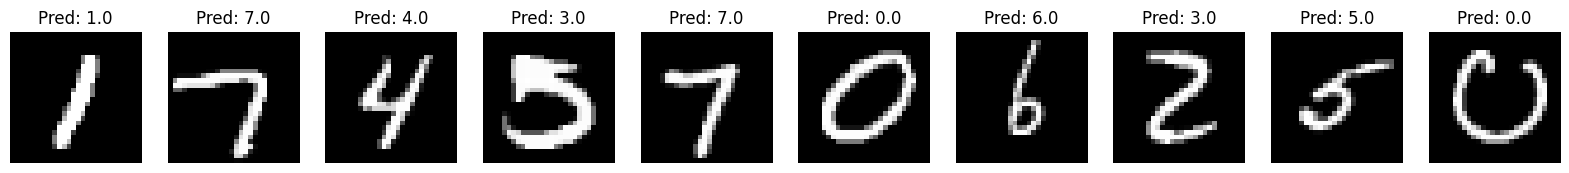

In [15]:
# Select a few samples to visualize
num_samples = 10
sample_indices = np.random.choice(len(test_X), num_samples, replace=False)
sample_images = test_X.data[sample_indices]
sample_predictions = test_predictions[sample_indices]

# Visualize the samples along with their predicted labels
fig, axes = plt.subplots(1, num_samples, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {sample_predictions[i]}')
    ax.axis('off')
plt.show()